## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.3: surface density profiles of atomic and molecular gas in the Galaxy

#### HI data from Kalberla & Kerp 2009 Annual Reviews Figures 5 and 6
#### H2 data from Heyer & Dame 2015 Figures 6 and 7
#### digitized using https://apps.automeris.io/wpd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d as smooth
%matplotlib inline

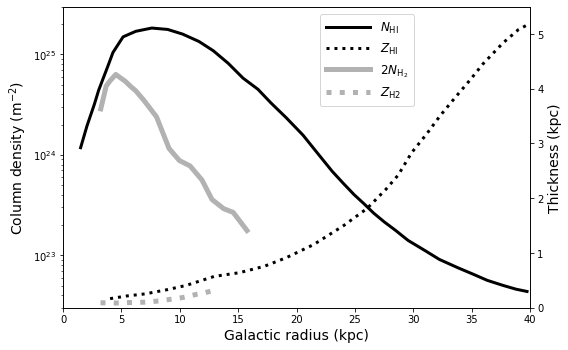

In [7]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)

# Kalberla HI profile
R_HI, Sigma_HI = np.genfromtxt('kalberla_HI_surface_density.txt', unpack=True, delimiter=',')
N_HI = 1e22 * Sigma_HI
ax1.plot(R_HI, N_HI, 'k-', lw=3, label=r'$N_{\rm HI}$')
#ax1.plot(R_HI, smooth(N_HI,sigma=1.5), 'k-', lw=3, label=r'$N_{\rm HI}$')
# dummy plot for legend
ax1.plot(R_HI, N_HI/1e5, 'k:', lw=3, label=r'$Z_{\rm HI}$')

# Heyer profile
R_H2, Sigma_H2 = np.genfromtxt('heyer_H2_surface_density.txt', unpack=True, delimiter=',')
N_H2 = 1.25e24 * Sigma_H2
ax1.plot(R_H2, N_H2, 'k-', lw=5, alpha=0.3, label=r'$2N_{\rm H_2}$')
#ax1.plot(R_H2, smooth(N_H2,sigma=1.5), 'k:', lw=6, alpha=0.3, label=r'$2N_{\rm H_2}$')
# dummy plot for legend
ax1.plot(R_H2, N_H2/1e5, 'k:', lw=5, alpha=0.3, label=r'$Z_{\rm H2}$')

ax1.set_xlim(0,40)
ax1.set_ylim(3e22,3e25)
ax1.set_yscale('log')
ax1.set_xlabel("Galactic radius (kpc)", fontsize=14)
ax1.set_ylabel(r"Column density (m$^{-2}$)", fontsize=14)

# exponential comparison
'''
r = np.linspace(5,35,5)
r0 = 3.75
f = np.exp(-r/r0)
ax1.plot(r, 3e26*f, 'r--')
ax1.plot(r, 1.5e25*f, 'r--')
'''

# flaring profiles
# note Kalberla plots HWHM so multiply by 2
ax2 = ax1.twinx()
R_HI, Z_HI = np.genfromtxt('kalberla_HI_flaring.txt', unpack=True, delimiter=',')
Z_HI *= 2
ax2.plot(R_HI, Z_HI, 'k:', lw=3, label=r'$Z_{\rm HI}$')
R_H2, Z_H2 = np.genfromtxt('heyer_H2_flaring.txt', unpack=True, delimiter=',')
Z_H2 /= 1000
ax2.plot(R_H2, Z_H2, 'k:', lw=5, alpha=0.3, label=r'$Z_{\rm H2}$')
ax2.set_ylim(0,5.5)
ax2.set_ylabel(r"Thickness (kpc)", fontsize=14)

ax1.legend(handlelength=3.7, borderpad=0.5, labelspacing=0.5,
    fontsize='large', loc=(0.55,0.67))

fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
plt.savefig('galaxy_HI_CO_profile.pdf')